#Install and Import Devcloud library

In [1]:
%pip install devcloud

from devcloud import Devcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Login to Devcloud
Requires token to login, user needs to acquire it from https://frontend.apps.cfa.devcloud.intel.com/

Once logged-in open click on the User Profile at the top right corner and select **Copy API Token** once done a modal appear and on click of **Copy** button the token is copied to clipboard

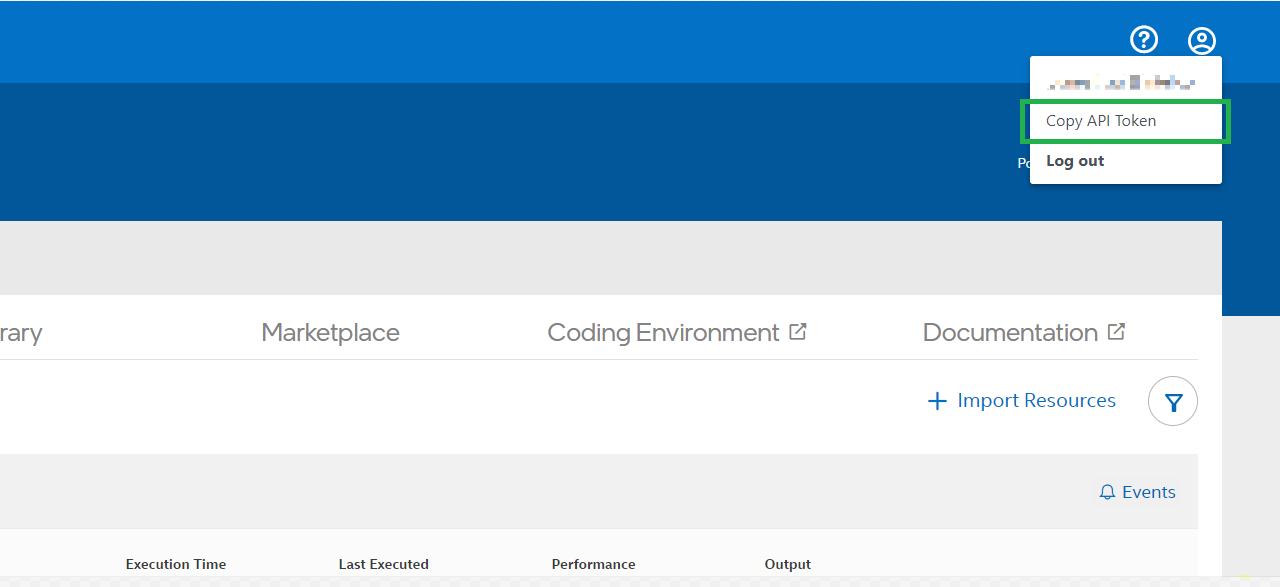

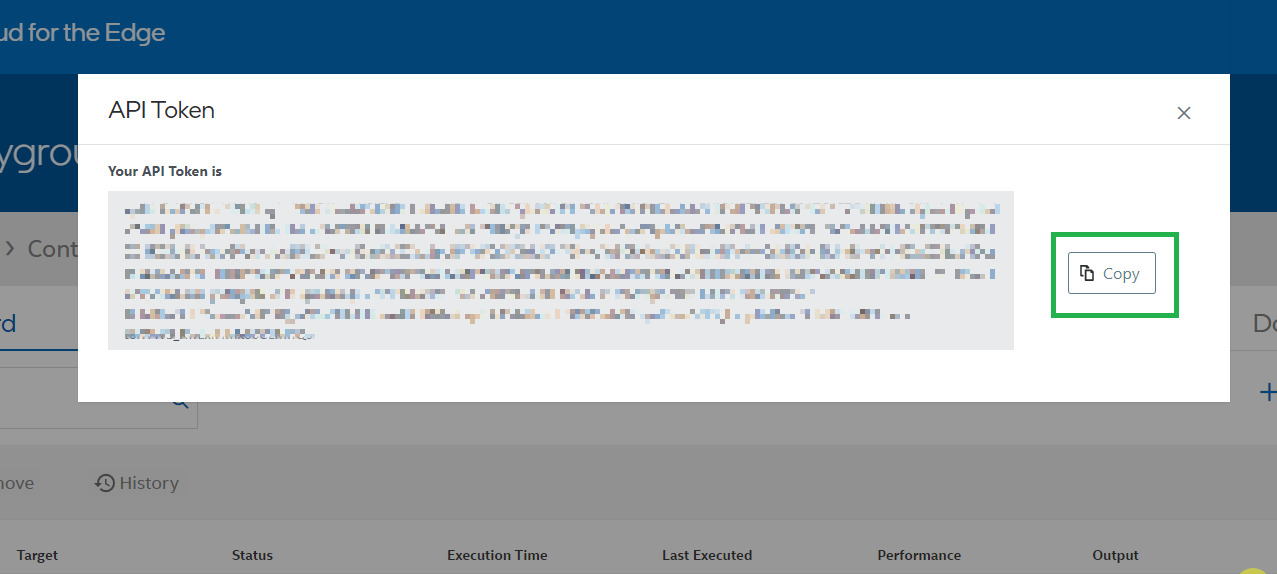

## Connecting to Devcloud

Once user has the token taken from the above step. Please input it to below connect API 



```
Devcloud.connect()
args: None
return None
Need to enter token when prompted
```



In [2]:
Devcloud.connect()

Token:··········
LoggedIn
Overview - Project
+----------+--------------+-----------------------+---------------------------------------------------+
|   Sr.No. |   project_id |         Name          |                    Description                    |
+==========+==============+=======================+===================================================+
|        1 |       723093 | people-counter-system | Deploy a smart video IoT solution using a person  |
|          |              |                       |    detection model from Intel® Distribution of    |
|          |              |                       | OpenVINO™ toolkit to detect and counter people in |
|          |              |                       |            each frame of a video feed.            |
+----------+--------------+-----------------------+---------------------------------------------------+
|        2 |       722691 |       git-demo        |                                                   |
+----------+-------

#Transfer training model from AWS S3 to Devcloud



```
Devcloud.transfer(region: str, bucketName: str, path: List, accessKey: str="", secretKey: str="")
args:
region: str - AWS bucket region
bucketName: str - Name of the bucket
path: str - file/folder path present relative to the bucket to be copied to devcloud
accessKey: str (Optional) - Access key of AWS S3 bucket
secretKey: str (Optional) - Secret key of AWS S3 bucket

If access and secret key isn't entered, then user will be prompted to enter
```

More detail on this feature is present in 
[Developer Guide](https://www.intel.com/content/www/us/en/develop/documentation/devcloud-containers/top/enable-cloud-storage.html)

Files used: [run.sh](https://github.com/intel/DevCloudContent-git/blob/inference-to-training/training-to-inference/run.sh)
[unet_kits19.xml,unet_kits19.bin](https://github.com/openvinotoolkit/openvino_notebooks/tree/main/notebooks/210-ct-scan-live-inference/pretrained_model)

In [3]:
AWS_REGION_NAME = "us-west-1"
AWS_BUCKET_NAME = "test-bucket"
Devcloud.transfer(AWS_REGION_NAME, AWS_BUCKET_NAME,["unet_kits19.mapping","unet_kits19.xml","unet_kits19.bin","run.sh"])

Access Key:··········
Secret Key:··········
Successfully connected to S3
Successfully import from S3


#List the available Intel's latest and greatest hardware



```
Devcloud.availableHardware()
args: None
return: None

Prints available hardware and their respective ID, Processor Name, Integrated GPU Name and Memory detail
```

For more detail on available edge node detail [Available Hardware](https://www.intel.com/content/www/us/en/develop/documentation/devcloud-containers/top/available-hardware.html)

In [4]:
Devcloud.availableHardware()

+------+-------------------------------------------+--------------------------------+----------+
|   Id |               processorName               |       integratedGpuName        |  memory  |
+======+===========================================+================================+==========+
|    1 |      Intel®  Xeon® D-2712T Processor      |              None              |   64GB   |
+------+-------------------------------------------+--------------------------------+----------+
|    2 |  Intel®  Xeon® Platinum-8357B Processor   |              None              |   64GB   |
+------+-------------------------------------------+--------------------------------+----------+
|    3 |  Intel® Gen13 Core™ i7-13700TE Processor  |    Intel® UHD Graphics 770     |   32GB   |
+------+-------------------------------------------+--------------------------------+----------+
|    4 |  Intel® Gen13 Core™ i9-13900TE Processor  |    Intel® UHD Graphics 770     |   32GB   |
+------+----------------------


#Create a container



```
Devcloud.createContainer(projectName: str, containerName: str, url: str)
Creates container image and stores in the devcloud
arg: 
projectName: str - Unique name of the project
containerName: str - Unique name of the container
url: str - Container image URL
returns: None
```



In [5]:
PROJECT_NAME="kidney-segmentation"
CONTAINER_NAME="openvino-kidney-segmentation"
Devcloud.createContainer(PROJECT_NAME, CONTAINER_NAME, "docker.io/openvino/openvino_tensorflow_ubuntu20_runtime")

Project kidney-segmentation created!.
container openvino-kidney-segmentation created!.


#Configure the container
Uses the transferred files from the AWS S3 and run the start script



```
Devcloud.configureContainer(projectName: str, containerName: str, port: list, label: list, entryScript: str, output: str, mountPoint: list, environment: str)
Configures the container with various option as mentioned below
arg:
projectName: str - Name of the project under which container present
containerName: str - Name of the container which needs to configured (This should be assigned to the project name mentioned above)
port: list[int] - Port number which must be exposed to external consumption. Port range must be above 1024 
label: list[str] - Label to be associated to the container
entryScript: str - Initial file which must be executed when container boots up
output: str - Output mount folder, which can be later accessed using Devcloud file system
mountPoint: list[(str, str)] - To mount Devcloud file system to user's container. This is a tuple, were first one is for Devcloud file system path and second is mount point in container. Multiple such mount path can be assigned
environment: str - environment variable to be passed to container. eg., -e token=XYZ 
```



In [6]:
Devcloud.configureContainer(PROJECT_NAME, CONTAINER_NAME, [], [], "/s3/run.sh", "/mount_folder", [("/s3/" + AWS_BUCKET_NAME, "/s3")], "")


Updated the configuration!!


#Lauch the container with the hardware selection from the above table



```
Devcloud.launch(projectName: str, edgeNode: int)
Launches the Project against the selected hardward

projectName: str - Name of the project which should be lauched
edgeNode: int - Intel's latest and greatest hardware to be used. Get the list by calling Devcloud.availableHardware()
```



In [7]:
Devcloud.launch(PROJECT_NAME, 18)

successfully launched!!


#Check the status of the project



```
Devcloud.getStatus()

Displays launched project status
```



In [12]:
Devcloud.getStatus(projectName=PROJECT_NAME, output="wide")

+---------------------+-----------------+------------+------------------+---------------------+-------+--------------+
|       project       |     target      |   status   |   execution time |     create time     |   fps |   Throughput |
+=====================+=================+============+==================+=====================+=======+==============+
| kidney-segmentation | Xeon Gold-6212U | TERMINATED |              206 | 2023-03-01 16:31:06 | 28.18 |         2.45 |
+---------------------+-----------------+------------+------------------+---------------------+-------+--------------+


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


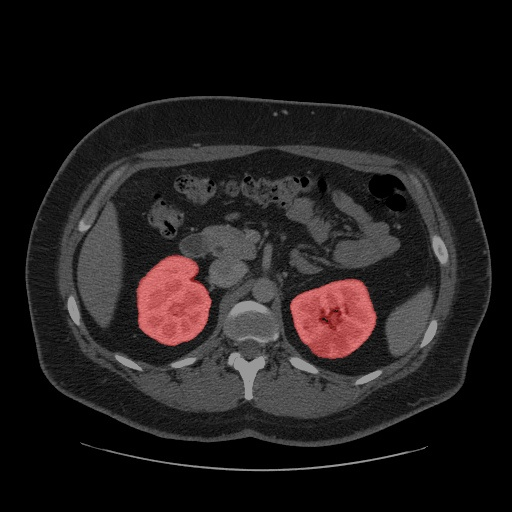

In [13]:
%pip install Pillow
import IPython.display
import PIL.Image
from PIL import Image
from io import StringIO
import io
image_bytes = Devcloud.getFilesPreview(PROJECT_NAME, path="output/inference/24_inference.jpeg")
img = PIL.Image.open(image_bytes)
IPython.display.display(img)

#Benchmarking

Benchmarking your model. More information on benchmarking [Openvino Benchmarking](https://docs.openvino.ai/latest/openvino_inference_engine_tools_benchmark_tool_README.html)


Files used: Files used: [run.sh](https://github.com/intel/DevCloudContent-git/blob/inference-to-training/training-to-inference/run.sh) 
[unet_kits19.xml,unet_kits19.bin](https://github.com/openvinotoolkit/openvino_notebooks/tree/main/notebooks/210-ct-scan-live-inference/pretrained_model) [benchmark_run.sh](https://github.com/intel/DevCloudContent-git/blob/inference-to-training/training-to-inference/benchmark_run.sh)


In [19]:
BENCHMARK_PROJECT = "kidney-segmentation-benchmark"
BENCHMARK_CONTAINER = "container-kidney-segmentation-benchmark"

Devcloud.transfer(AWS_REGION_NAME,AWS_BUCKET_NAME,["unet_kits19.mapping","unet_kits19.xml","unet_kits19.bin","run.sh", "benchmark_run.sh"])
Devcloud.createContainer(BENCHMARK_PROJECT, BENCHMARK_CONTAINER, "docker.io/openvino/ubuntu20_dev")

Access Key:··········
Secret Key:··········
Successfully connected to S3
Successfully import from S3
Project kidney-segmentation-benchmark created!.
container container-kidney-segmentation-benchmark created!.


In [20]:
Devcloud.configureContainer(BENCHMARK_PROJECT, BENCHMARK_CONTAINER, [], [], "/s3/benchmark_run.sh", "/mount_folder", [("/s3/" + AWS_BUCKET_NAME, "/s3")], "")


Updated the configuration!!


In [21]:
Devcloud.launch(BENCHMARK_PROJECT, 18)

successfully launched!!


In [22]:
res = Devcloud.getFilesPreview(BENCHMARK_PROJECT, path="benchmark_report.csv")


In [23]:
import csv
decoded_content = res.read().decode('utf-8')

cr = csv.reader(decoded_content.splitlines(), delimiter=';')
my_list = list(cr)
for row in my_list:
    print(row)

['Command line parameters']
['-m', '/s3/unet_kits19.xml']
['-report_folder', '/mount_folder']
['-report_type', 'detailed_counters']
[]
['Configuration setup']
['topology', 'Model1']
['target device', 'CPU']
['API', 'async']
['inference_only', 'True']
['precision', 'UNSPECIFIED']
['batch size', '1']
['number of iterations', 'None']
['number of parallel infer requests', '12']
['duration (ms)', '60000']
[]
['Execution results']
['read model time (ms)', '28.73']
['compile model time (ms)', '188.17']
['first inference time (ms)', '132.14']
['total execution time (ms)', '60736.54']
['total number of iterations', '1188']
['latency (ms)', '606.47']
['avg latency', '611.97']
['min latency', '324.61']
['max latency', '815.69']
['throughput', '19.56']
[]
